# 순환 신경망
 
기존의 완전 연결 네트워크나 컨브넷등의 신경망은 모든 입력이 __개별적으로 처리__ 된다.   
이런 네트워크로 시퀀스(순서대로 하나씩 나열하여 나타낸 데이터 구조)나 시계열 데이터(시간에 따른 데이터)를 처리하려면 __네트워크에 전체 시퀀스를 주입__ 해야 한다.   
그렇기에 문장같은 데이터는 정보 처리를 위한 __내부 모델을 유지하며 점진적__ 으로 정보를 처리한다   
#### 순환 신경망(Recurrent Neural network, RNN)은 시퀀스 원소를 순회하며 처리한 정보를 상태에 저장한다.
> 사실상 RNN은 내부에 루프를 가진 신경망의 종류이다

In [6]:
# IMDB 데이터 전처리하기
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어 수
maxlen = 500  # 사용할 텍스트 길이
batch_size=32

print('--데이터 로딩--')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')
print('시퀀스 패딩')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

# 임베딩 층과 SimpleRNN으로 순환 네트워크 훈련
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
h = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

--데이터 로딩--
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)
Epoch 1/10
157/157 [==============================] - 40s 136ms/step - loss: 0.6609 - acc: 0.5801 - val_loss: 0.5179 - val_acc: 0.7586
Epoch 2/10
157/157 [==============================] - 20s 127ms/step - loss: 0.3984 - acc: 0.8335 - val_loss: 0.3779 - val_acc: 0.8396
Epoch 3/10
157/157 [==============================] - 20s 127ms/step - loss: 0.2927 - acc: 0.8824 - val_loss: 0.3548 - val_acc: 0.8522
Epoch 4/10
157/157 [==============================] - 20s 126ms/step - loss: 0.2418 - acc: 0.9049 - val_loss: 0.4418 - val_acc: 0.8178
Epoch 5/10
157/157 [==============================] - 20s 128ms/step - loss: 0.2075 - acc: 0.9217 - val_loss: 0.4934 - val_acc: 0.8326
Epoch 6/10
157/157 [==============================] - 20s 130ms/step - loss: 0.1570 - acc: 0.9416 - val_loss: 0.3962 - val_acc: 0.8526
Epoch 7/10
157/157 [==============================] - 20s 127ms/step - loss: 0.1617 - ac

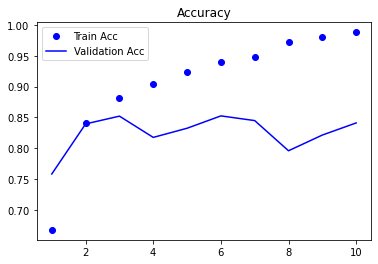

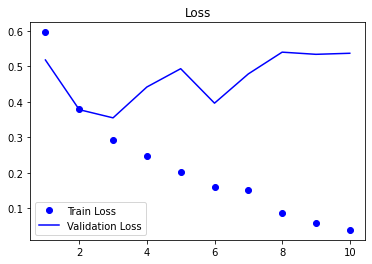

In [7]:
# 그래프를 확인해 보자궁!
import matplotlib.pyplot as plt

acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

결과가 나쁘지는 않은데 데이터도 500개만 썻고 __SimpleRNN이 긴 시퀀스(텍스트) 처리하는데 적합하지 않아서__ 아쉽다
> SimpleRNN은 너무 간단해서 실제로는 사용 거의 안함

### LSTM
> 많은 텍스트 처리에서 장기적으로 기억해야 할 때 쓰이는 RNN의 한 종류

기존의 RNN은 입력값과 이전 함수의 값을 이용해 출력을 하지만 이 과정이 계속 될수록 __기울기가 0이되어__ 오래된 단어들을 기억하지 못한다.   
그래서 LSTM은 기울기에 제한을 두어 오래된 데이터도 기억할 수 있다.
> LSTM은 state가 두개로 이전 데이터를 기억하는 것과 얼만큼 기억하게 할 것인지가 있다.

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

h = model.fit(input_train, y_train, epochs = 10, batch_size=128, validation_split=0.2)

Epoch 1/10
 84/157 [===============>..............] - ETA: 54s - loss: 0.6689 - acc: 0.6042

KeyboardInterrupt: 

In [ ]:
# 그래프를 확인해 보자궁!
import matplotlib.pyplot as plt

acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()